In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = (20,10)

In [71]:
cases = pd.read_csv('WHO-COVID-19-global-data-2.csv')
cases = cases[['Date_reported','Country','New_cases','Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]
country_name = "Germany"
country_filter = cases['Country'] == country_name
cases = cases[country_filter]

In [72]:
date = cases['Date_reported'].values
deats_by_day = cases['New_deaths'].values
cases_by_day = cases['New_cases'].values

In [73]:
number_of_items = len(date)
days = np.arange(1, number_of_items+1)

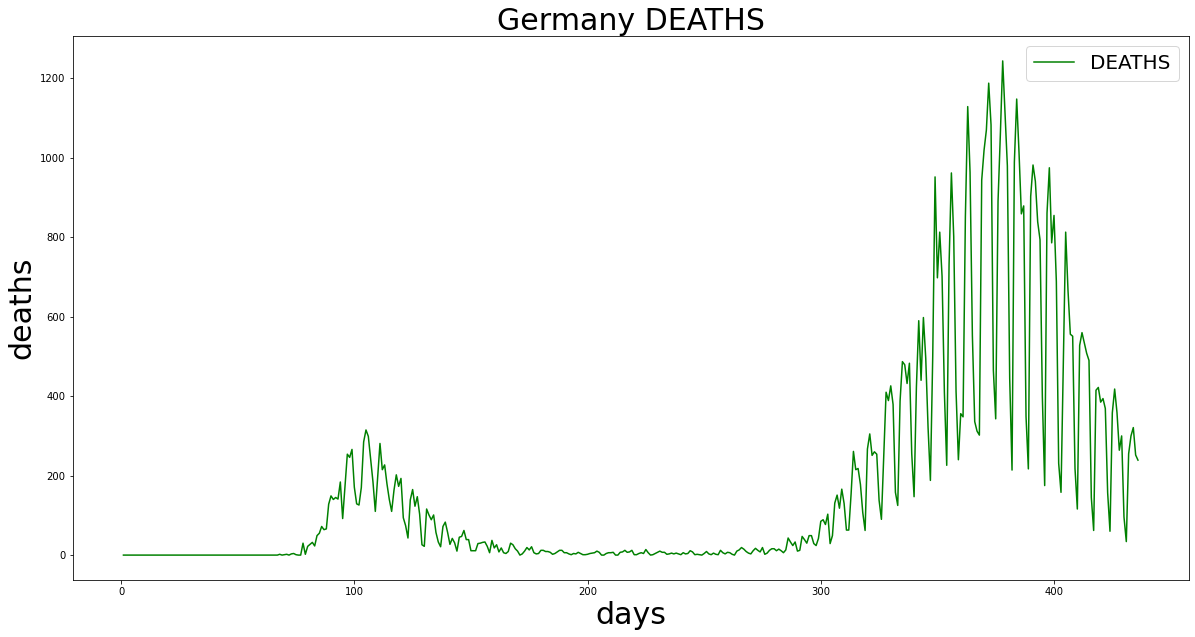

In [74]:
plt.plot(days, deats_by_day, label="DEATHS", color="green")
plt.title(country_name+" DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [75]:
def mape(true, pred):
    return np.mean(np.abs((true-pred)/true))*100
def mse(true, predictions):
    return np.mean((true-predictions)**2)
def rmse(true, predictions):
    return np.mean((true-predictions)**2)**0.5

# Moving Average

In [76]:
deaths_starting_from_67 = deats_by_day[67:]

# MA3

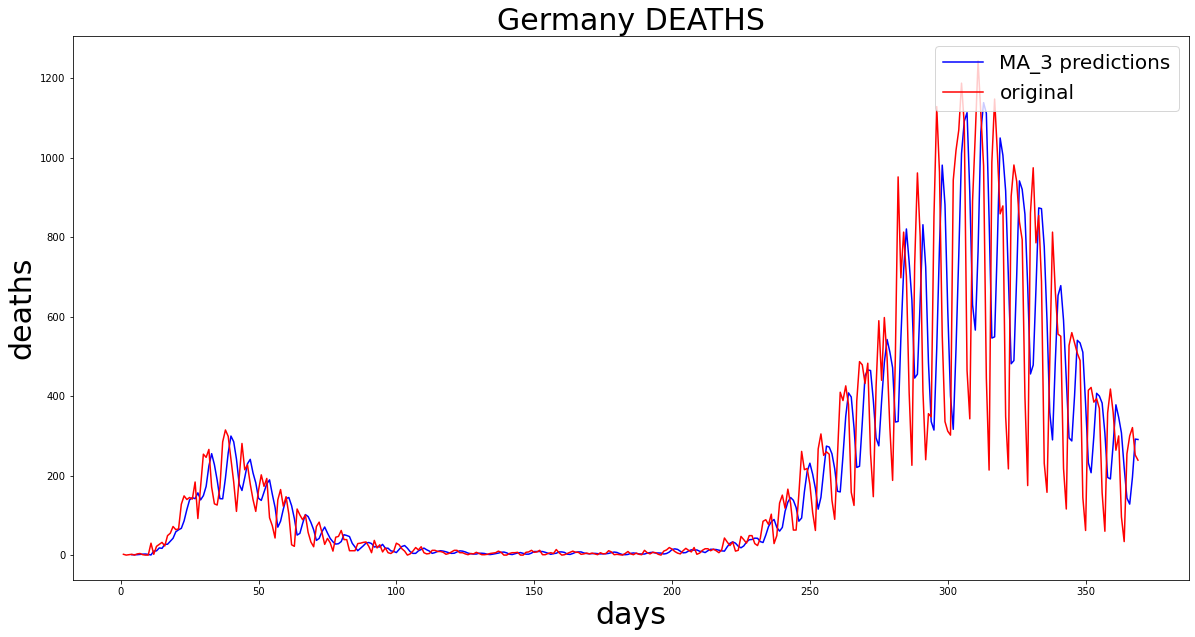

In [77]:
ma_3=[]
for i in range(len(deaths_starting_from_67)-3):
    ma_3.append((deaths_starting_from_67[i] + deaths_starting_from_67[i+1] + deaths_starting_from_67[i+2])/3.0)

plt.plot(np.arange(4,len(ma_3)+4), ma_3, label="MA_3 predictions", color="blue")
plt.plot(np.arange(1,len(deaths_starting_from_67)+1), deaths_starting_from_67, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [78]:
ma_3 = np.array(ma_3)
mask = deaths_starting_from_67[3:]!=0
ma_3_input = deaths_starting_from_67[3:]

In [10]:
mape(ma_3_input[mask], ma_3[mask])

82.16785247972143

In [11]:
mse(ma_3_input[mask], ma_3[mask])

31983.966197183094

In [12]:
rmse(ma_3_input[mask], ma_3[mask])

178.84061674346546

# MA2

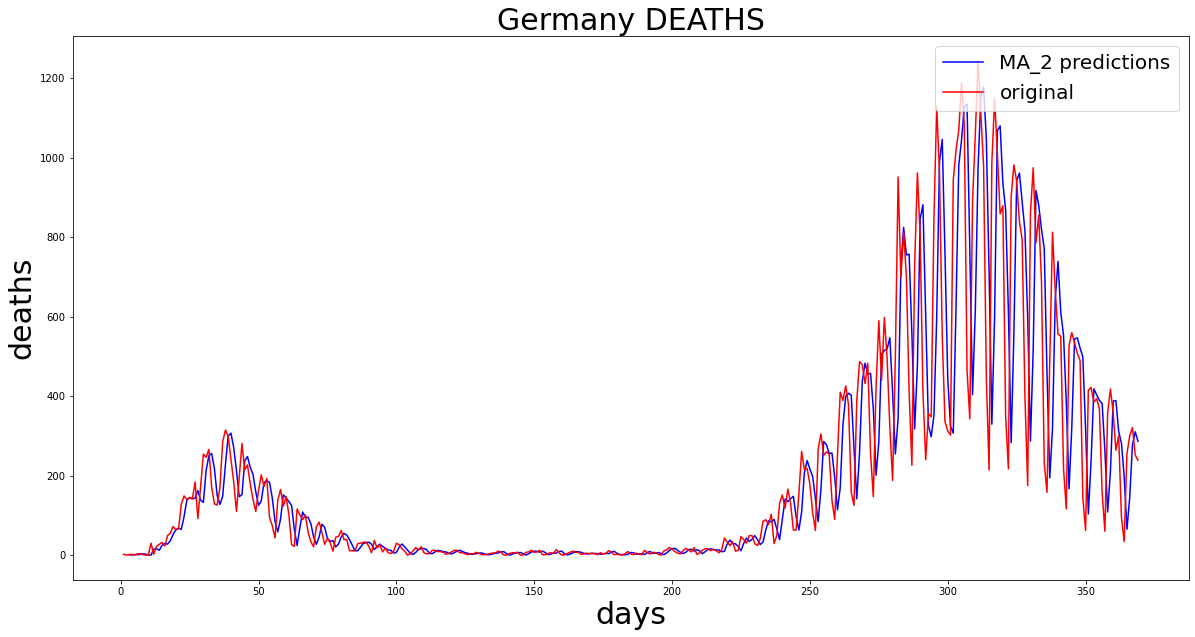

In [13]:
ma_2=[]
for i in range(len(deaths_starting_from_67)-2):
    ma_2.append((deaths_starting_from_67[i] + deaths_starting_from_67[i+1])/2.0)

plt.plot(np.arange(3,len(ma_2)+3), ma_2, label="MA_2 predictions", color="blue")
plt.plot(np.arange(1,len(deaths_starting_from_67)+1), deaths_starting_from_67, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [14]:
ma_2 = np.array(ma_2)
mask = deaths_starting_from_67[2:]!=0
ma_2_input = deaths_starting_from_67[2:]

In [15]:
mape(ma_2_input[mask], ma_2[mask])

77.29995119181442

In [16]:
mse(ma_2_input[mask], ma_2[mask])

28908.85533707865

In [17]:
rmse(ma_2_input[mask], ma_2[mask])

170.02604311422016

# MA1

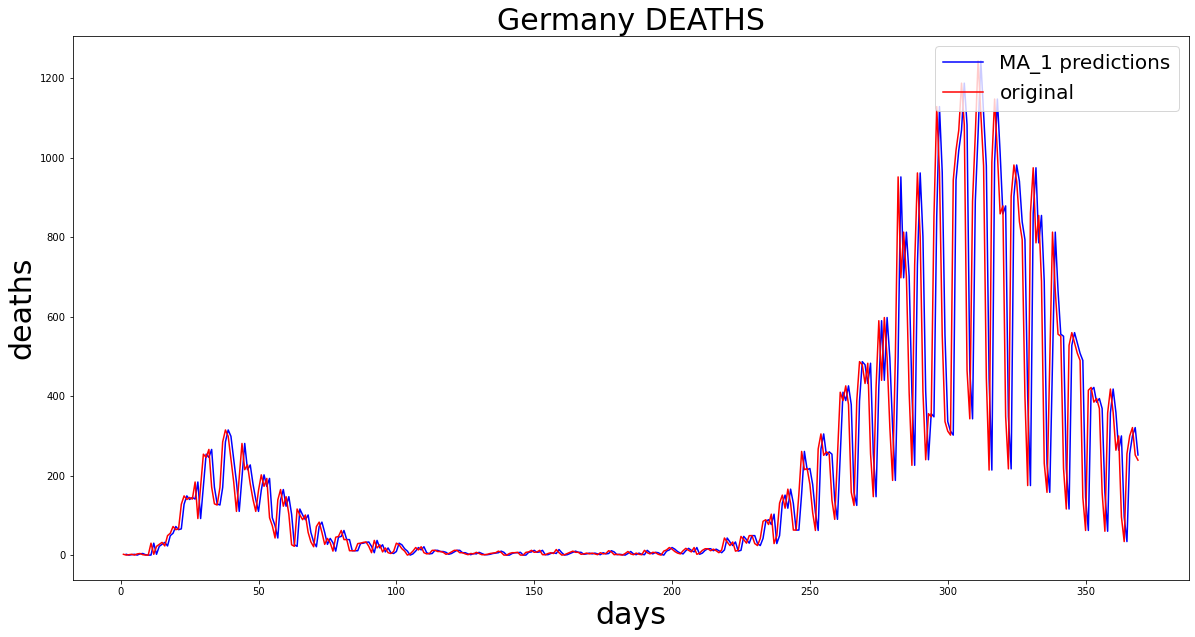

In [18]:
ma_1=[]
for i in range(len(deaths_starting_from_67)-1):
    ma_1.append(deaths_starting_from_67[i])
plt.plot(np.arange(2,len(ma_1)+2), ma_1, label="MA_1 predictions", color="blue")
plt.plot(np.arange(1,len(deaths_starting_from_67)+1), deaths_starting_from_67, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [19]:
ma_1 = np.array(ma_1)
mask = deaths_starting_from_67[1:]!=0
ma_1_input = deaths_starting_from_67[1:]

In [20]:
mape(ma_1_input[mask], ma_1[mask])

66.25288152051796

In [21]:
mse(ma_1_input[mask], ma_1[mask])

20852.817415730337

In [22]:
rmse(ma_1_input[mask], ma_1[mask])

144.4050463651819

# MA7

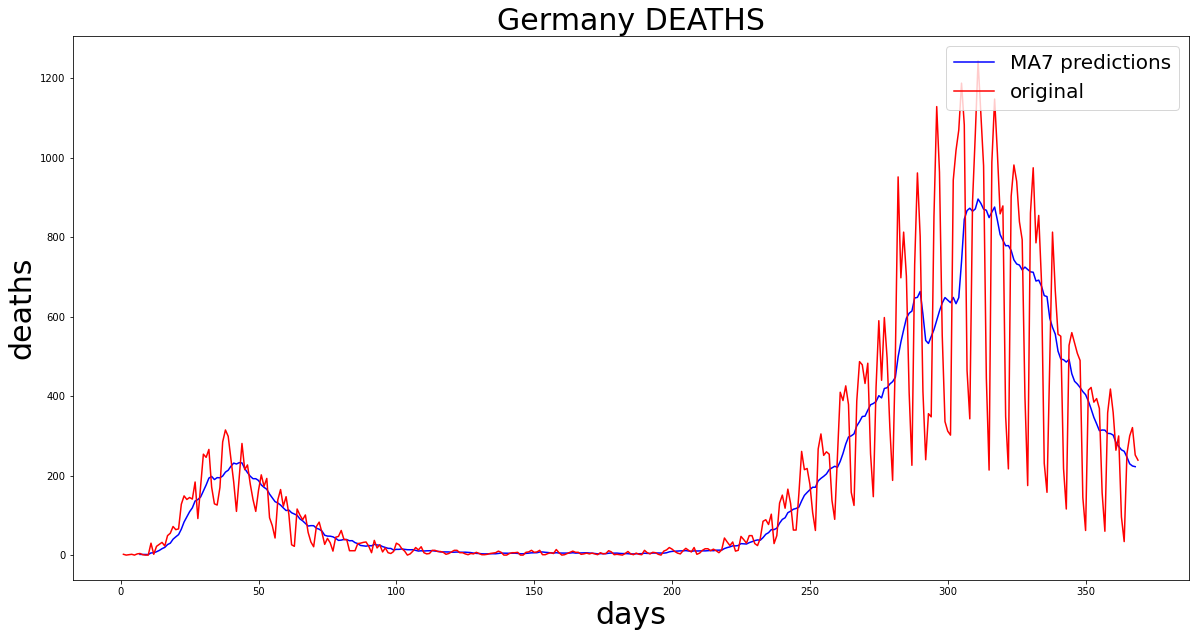

In [23]:
ma7 = []
for i in range(len(deaths_starting_from_67)-7):
    ma7.append((deaths_starting_from_67[i] + 
                deaths_starting_from_67[i+1] + 
                deaths_starting_from_67[i+2] + 
                deaths_starting_from_67[i+3] + 
                deaths_starting_from_67[i+4] + 
                deaths_starting_from_67[i+5] + 
                deaths_starting_from_67[i+6])/7.0)
    
plt.plot(np.arange(7,len(ma7)+7), ma7, label="MA7 predictions", color="blue")
plt.plot(np.arange(1,len(deaths_starting_from_67)+1), deaths_starting_from_67, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [24]:
ma7 = np.array(ma7)
mask = deaths_starting_from_67[7:]!=0
ma_7_input = deaths_starting_from_67[7:]

In [25]:
mape(ma_7_input[mask], ma7[mask])

73.51420846851163

In [26]:
mse(ma_7_input[mask], ma7[mask])

20368.945384972172

In [27]:
rmse(ma_7_input[mask], ma7[mask])

142.7198142689801

# MA1_LAG7

In [28]:
lag_7 = deaths_starting_from_67[7:]- deaths_starting_from_67[:len(deaths_starting_from_67)-7]

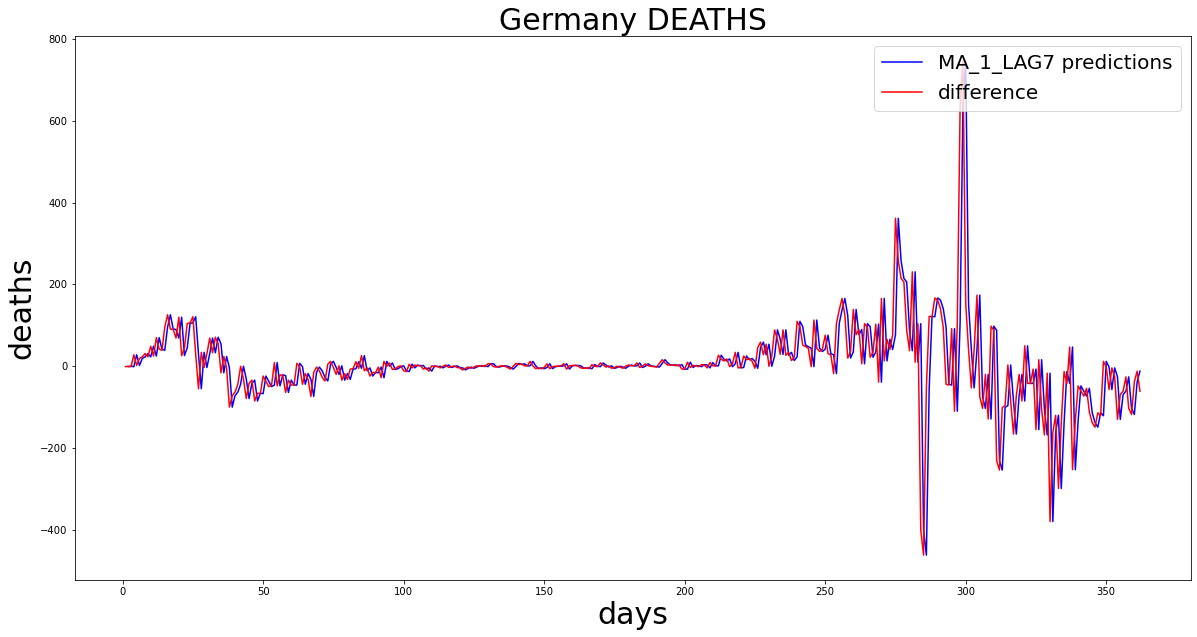

In [29]:
ma_1_lag7=[]
for i in range(len(lag_7)-1):
    ma_1_lag7.append(lag_7[i])
plt.plot(np.arange(2,len(ma_1_lag7)+2), ma_1_lag7, label="MA_1_LAG7 predictions", color="blue")
plt.plot(np.arange(1,len(lag_7)+1), lag_7, label="difference", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

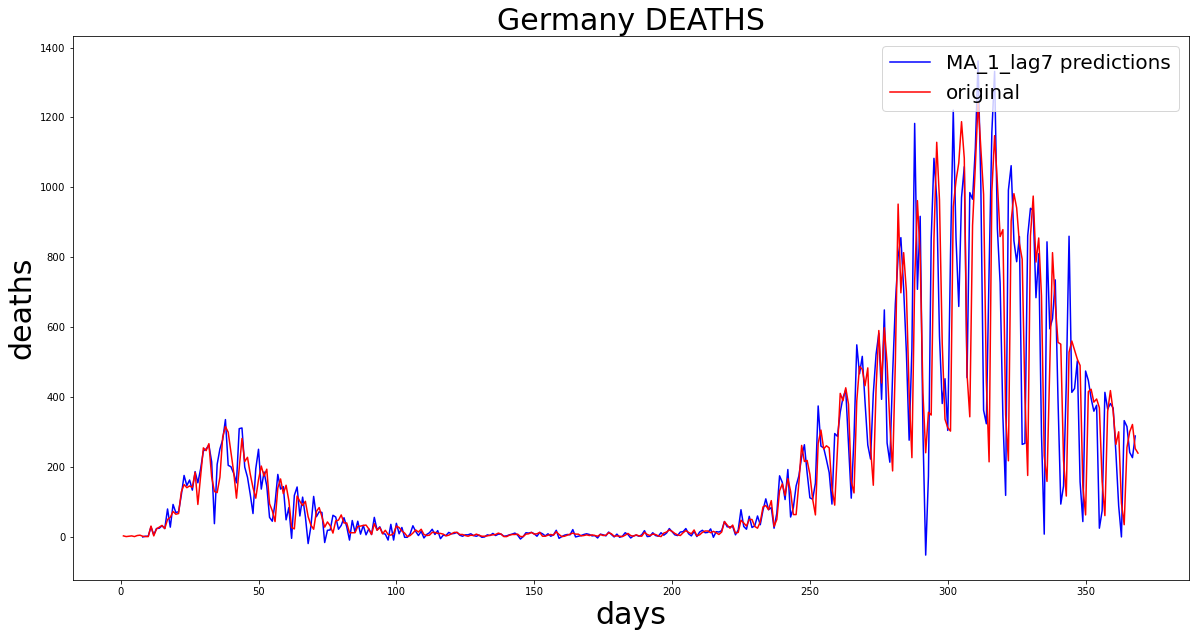

In [30]:
ma_1_lag7_org = ma_1_lag7 + deaths_starting_from_67[1:len(deaths_starting_from_67)-7]
plt.plot(np.arange(8,len(ma_1_lag7_org)+8), ma_1_lag7_org, label="MA_1_lag7 predictions", color="blue")
plt.plot(np.arange(1,len(deaths_starting_from_67)+1), deaths_starting_from_67, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [31]:
ma_1_lag7_org = np.array(ma_1_lag7_org)
mask = deaths_starting_from_67[8:]!=0
ma_1_lag7_input = deaths_starting_from_67[8:]

In [32]:
mape(ma_1_lag7_input[mask], ma_1_lag7_org[mask])

64.84814553741637

In [33]:
mse(ma_1_lag7_input[mask], ma_1_lag7_org[mask])

7663.017094017094

In [34]:
rmse(ma_1_lag7_input[mask], ma_1_lag7_org[mask])

87.53866056787191

# WEEKLY

In [35]:
weekly_average = []
for i in range(0, len(deaths_starting_from_67), 7):
    try:
        avg = (deaths_starting_from_67[i] + 
                deaths_starting_from_67[i+1] + 
                deaths_starting_from_67[i+2] + 
                deaths_starting_from_67[i+3] + 
                deaths_starting_from_67[i+4] + 
                deaths_starting_from_67[i+5] + 
                deaths_starting_from_67[i+6])/7.0
        weekly_average.append(avg)
    except:
        avg = (deaths_starting_from_67[i] + 
               deaths_starting_from_67[i+1] + 
               deaths_starting_from_67[i+2] + 
               deaths_starting_from_67[i+3])/3.0

In [36]:
number_of_weeks = len(weekly_average)
weeks = np.arange(1, number_of_weeks+1)

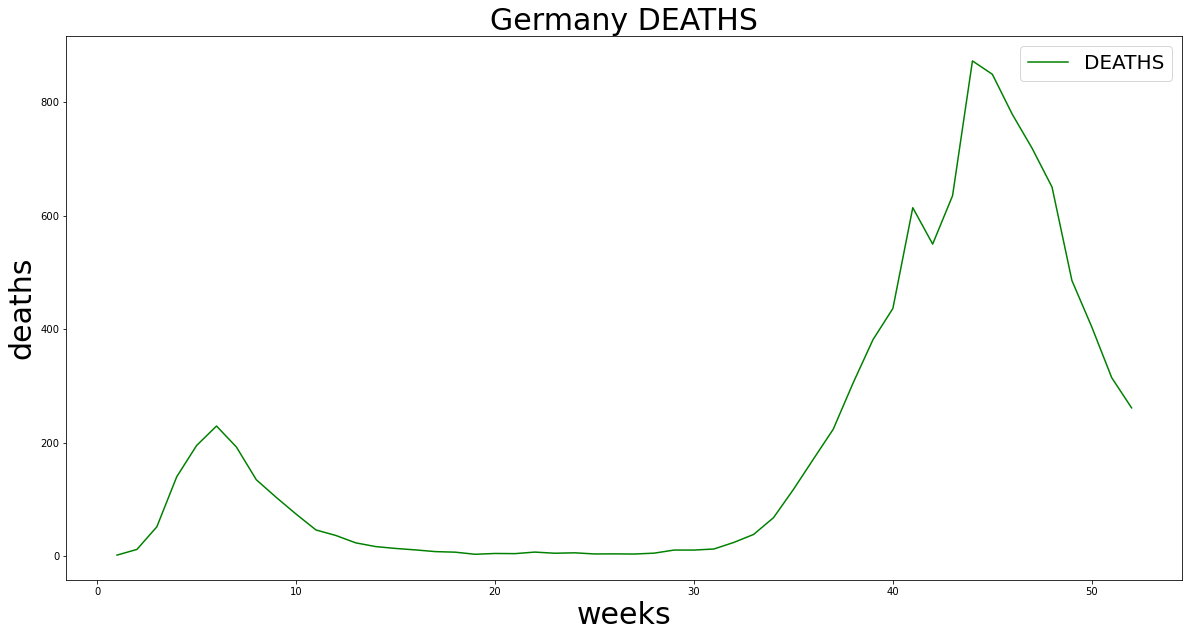

In [37]:
plt.plot(weeks, weekly_average, label="DEATHS", color="green")
plt.title(country_name+" DEATHS", fontsize = 30)
plt.xlabel("weeks", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

# WEEKLY MA1

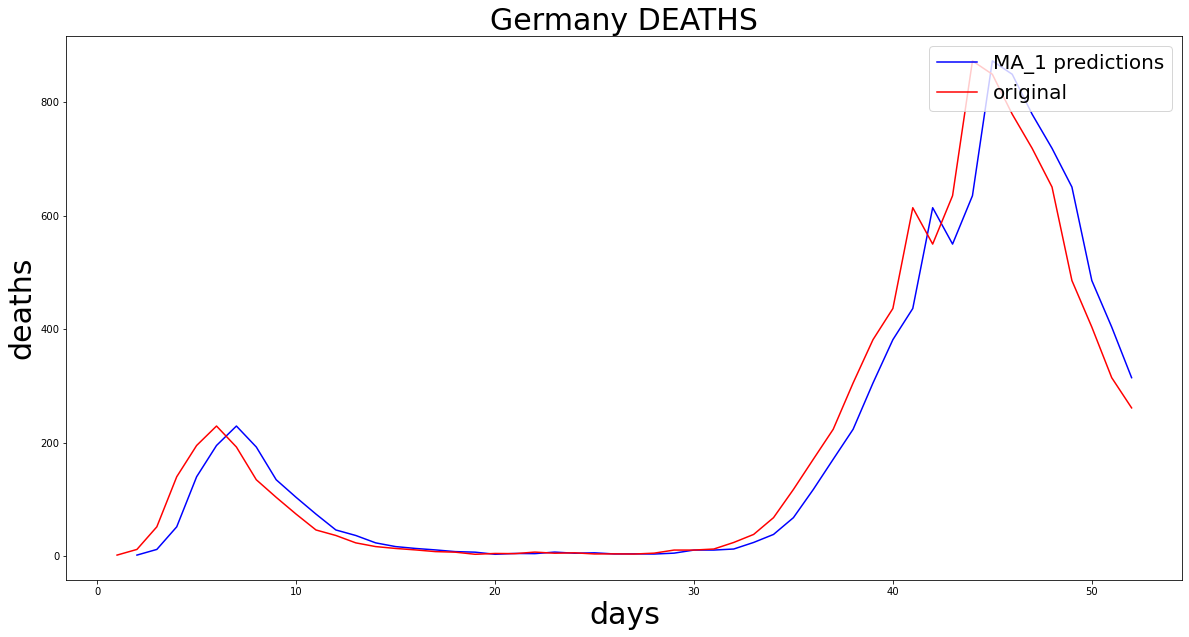

In [38]:
ma_1_weekly=[]
for i in range(len(weekly_average)-1):
    ma_1_weekly.append(weekly_average[i])
plt.plot(np.arange(2,len(ma_1_weekly)+2), ma_1_weekly, label="MA_1 predictions", color="blue")
plt.plot(np.arange(1,len(weekly_average)+1), weekly_average, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [39]:
mape(np.array(weekly_average[1:]), np.array(ma_1_weekly))

31.273406842466194

In [40]:
mse(np.array(weekly_average[1:]), np.array(ma_1_weekly))

4004.719887955183

In [41]:
rmse(np.array(weekly_average[1:]), np.array(ma_1_weekly))

63.282856193089

# WEEKLY MA2

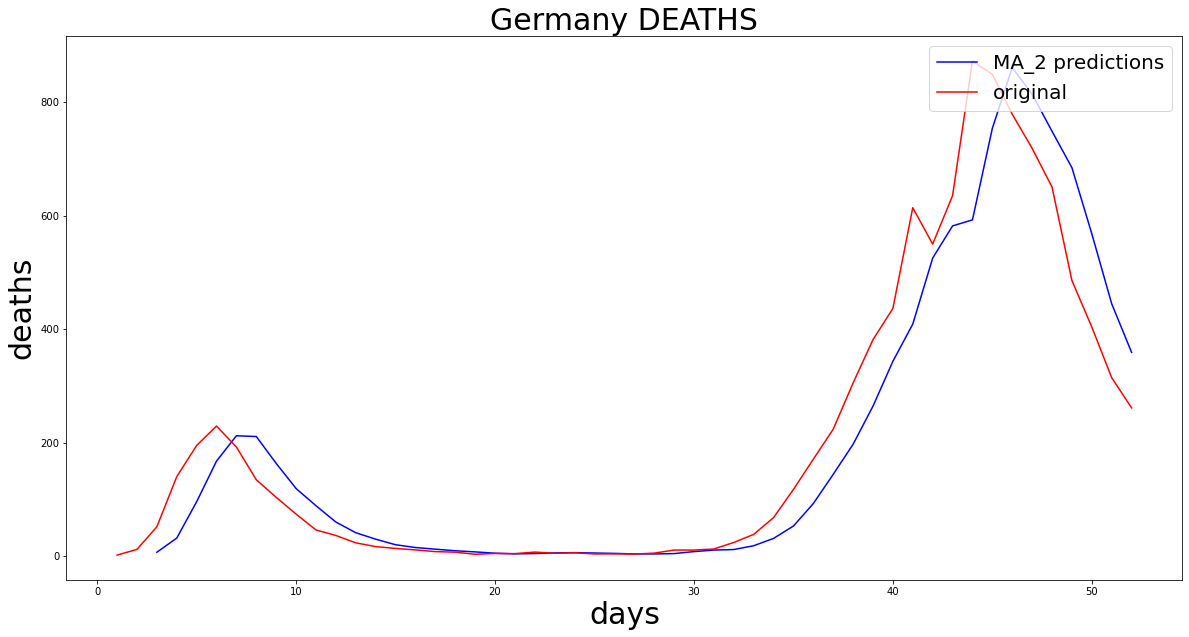

In [42]:
ma_2_weekly=[]
for i in range(len(weekly_average)-2):
    ma_2_weekly.append((weekly_average[i] + weekly_average[i+1])/2.0)

plt.plot(np.arange(3,len(ma_2_weekly)+3), ma_2_weekly, label="MA_2 predictions", color="blue")
plt.plot(np.arange(1,len(weekly_average)+1), weekly_average, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [43]:
mape(np.array(weekly_average[2:]), np.array(ma_2_weekly))

39.977652686425955

In [44]:
mse(np.array(weekly_average[2:]), np.array(ma_2_weekly))

6936.210816326531

In [45]:
rmse(np.array(weekly_average[2:]), np.array(ma_2_weekly))

83.2839169127301

# WEEKLY MA3

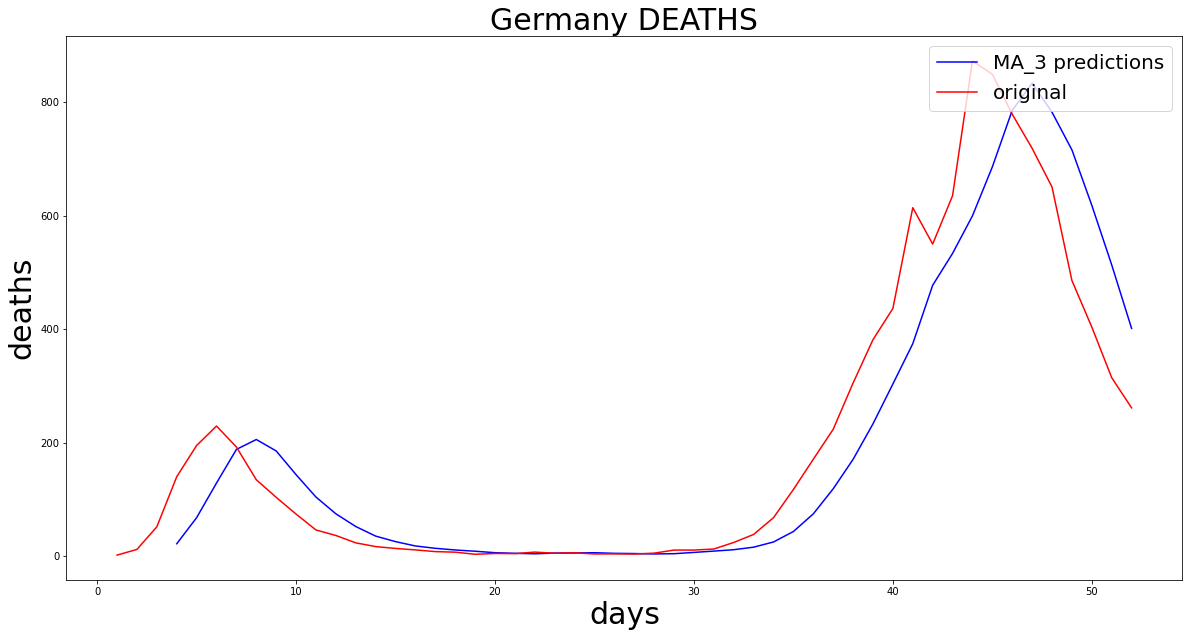

In [46]:
ma_3_weekly=[]
for i in range(len(weekly_average)-3):
    ma_3_weekly.append((weekly_average[i] + weekly_average[i+1] + weekly_average[i+2])/3.0)

plt.plot(np.arange(4,len(ma_3_weekly)+4), ma_3_weekly, label="MA_3 predictions", color="blue")
plt.plot(np.arange(1,len(weekly_average)+1), weekly_average, label="original", color="red")
plt.title(country_name + " DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [47]:
mape(np.array(weekly_average[3:]), np.array(ma_3_weekly))

51.685498955057454

In [48]:
mse(np.array(weekly_average[3:]), np.array(ma_3_weekly))

10466.679392845574

In [49]:
rmse(np.array(weekly_average[3:]), np.array(ma_3_weekly))

102.30679055099702